## Imports

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install re
!pip install tensorflow
!pip install re
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 667.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.4 kB 770.8 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.4 kB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/301.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 983.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import tensorflow as tf

In [15]:
!pip install scikit-learn
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'numpy.char'

## Importing Dataset

In [18]:
import pandas as pd
pip uninstall numpy
pip install numpy


# Load the CSV file from the URL into a DataFrame
fake = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv")

# Display the DataFrame
fake



SyntaxError: invalid syntax (3970126074.py, line 2)

In [ ]:
real = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")
real

In [ ]:
df = pd.concat([fake.sample(10)],ignore_index=True)
df = pd.concat([df,real.sample(10)],ignore_index=True)
df.to_csv("data.csv")

In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

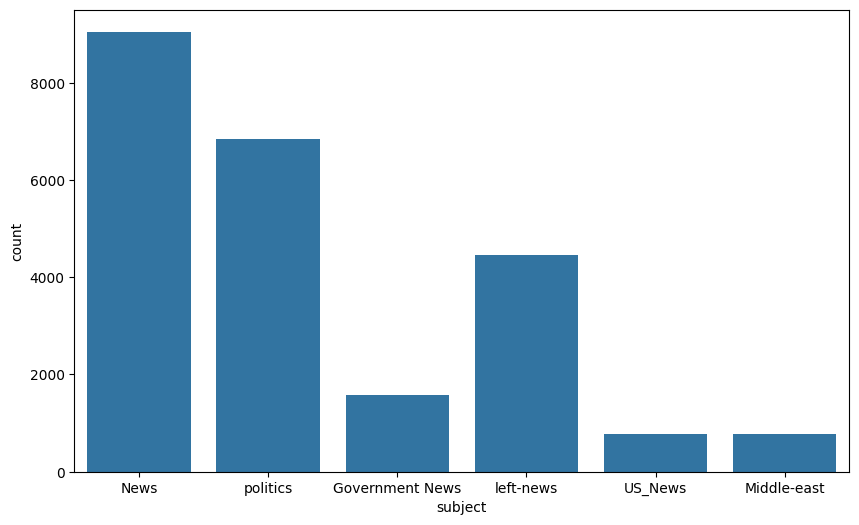

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

## Using WordCloud

here i am just joining all the text data with a space inorder to use wordCloud

In [ ]:
textfake = ' '.join(fake['text'].tolist())
textfake

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(textfake)

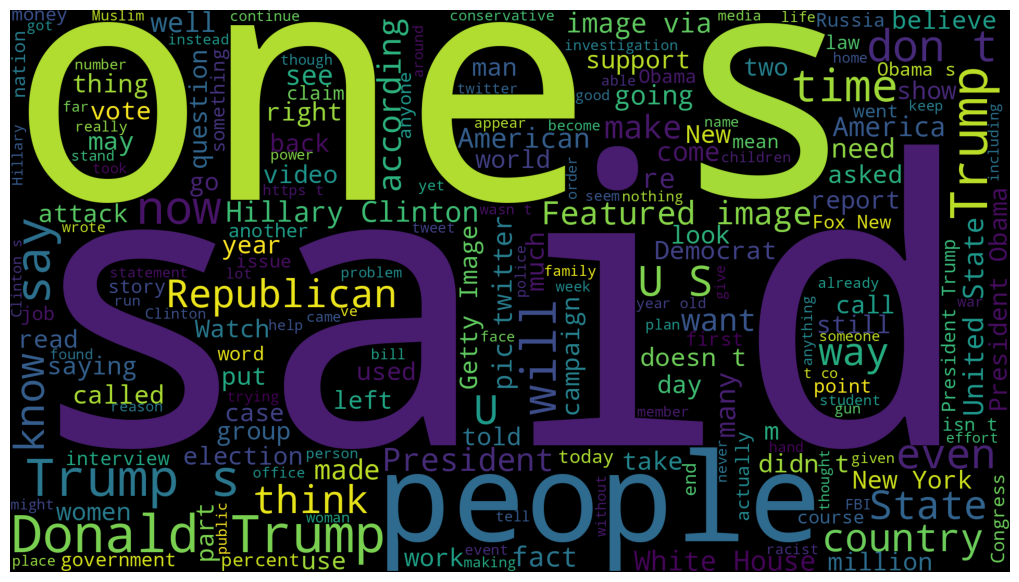

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Exploring with Real news

In [ ]:
real = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")
real

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
real['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

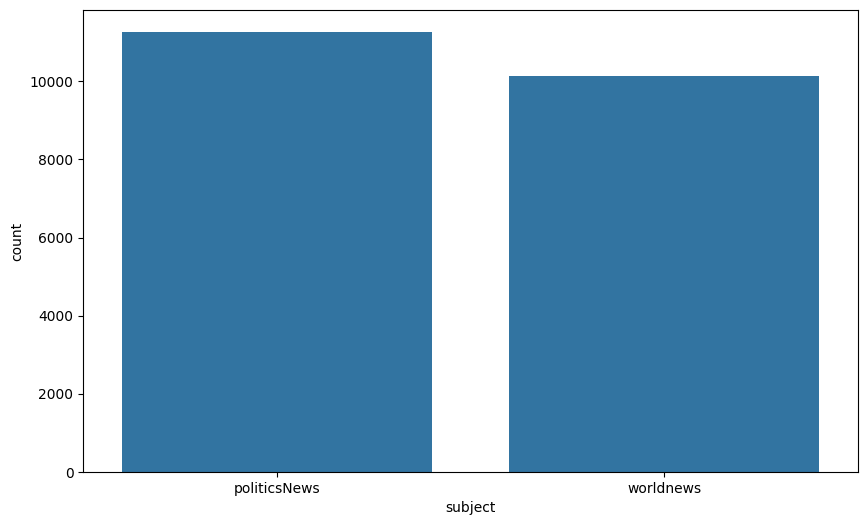

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=real)

In [ ]:
textreal = ' '.join(real['text'].tolist())

In [ ]:
wordcloudreal = WordCloud(width=1920,height=1080).generate(textreal)

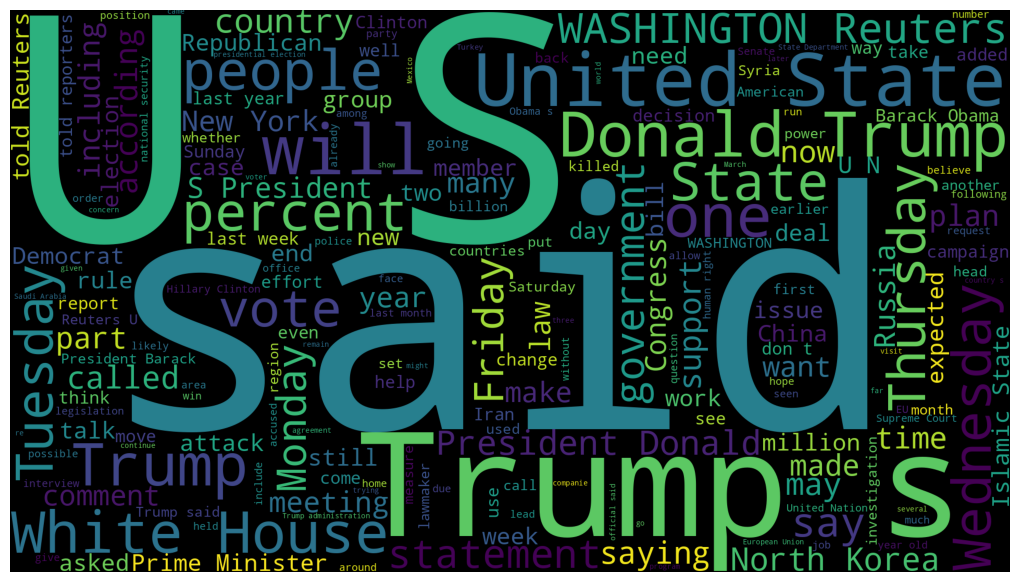

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloudreal)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Difference in Text

Real news seems to have source of publication which is not present in fake news set

Looking at the data:
<ul>
    <li>most of text contains reuters information</li>
    <li>Some text are tweets from Twitter</li>
    <li>Few text do not contain any publication info</li>
</ul>

## Cleaning Data

Removing Reuters or Twitter Tweet information from the text

<ul>
    <li>Text can be splitted only once at "-" which is always present after mentioning source of publication,this gives us publication part and text part</li>
    <li>If we do not get text part,this means publication details wasn't given for that record</li>
    <li>The Twitter tweets always have the same source,a long text of max 259 characters</li>
</ul>

In [ ]:
real.sample(5)

title  \
761    Ryan opens door to later corporate tax rate cu...   
4637   Senator seeks ethics probe of Mnuchin's 'Lego ...   
16780  'Despondent' May losing sleep on in-fighting, ...   
10526   Trump, anti-Trump forces start Florida ad battle   
4164   Chaffetz may not finish U.S. House term: media...   

                                                    text       subject  \
761    WASHINGTON (Reuters) - U.S. House Speaker Paul...  politicsNews   
4637   WASHINGTON (Reuters) - The top Democrat on the...  politicsNews   
16780  BRUSSELS (Reuters) - Theresa May looked  despo...     worldnews   
10526  (Reuters) - Donald Trump’s presidential campai...  politicsNews   
4164   WASHINGTON (Reuters) - U.S. Representative Jas...  politicsNews   

                    date  
761    November 8, 2017   
4637     March 28, 2017   
16780  October 22, 2017   
10526     March 4, 2016   
4164     April 20, 2017

In [ ]:
unknown_publishers = []

for index,row in enumerate(real.text.values):
    try:
        record = row.split("-",maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

here in the data there are some text values with empty cells which can potentially reduce the accuracy so we need to remove those

In [ ]:
real['text'].replace(' ', np.nan,inplace=True)
real= real.dropna(subset=['text'])

In [ ]:
real.iloc[8970]

title      Milestones in legal fight over Texas abortion law
text       (Reuters) - The U.S. Supreme Court is set to r...
subject                                         politicsNews
date                                          June 26, 2016 
Name: 8971, dtype: object

In [ ]:
publisher = []

tmp_text = []

for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append("Unknown")
        continue
    else:
        record = row.split("-",maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

len(publisher)

21416

In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text

<ipython-input-22-f617ae718f6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['publisher'] = publisher
<ipython-input-22-f617ae718f6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['text'] = tmp_text


In [ ]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  The head of a conservative Republican faction ...  politicsNews   
1  Transgender people will be allowed for the fir...  politicsNews   
2  The special counsel investigation of links bet...  politicsNews   
3  Trump campaign adviser George Papadopoulos tol...  politicsNews   
4  President Donald Trump called on the U.S. Post...  politicsNews   

                 date                     publisher  
0  December 31, 2017           WASHINGTON (Reuters)  
1  December 29, 2017           WASHINGTON (Reuters)  
2  December 31, 2017           WASHINGTON (Reuters)  
3  December 30, 2017           WASHINGTON (Reuters)  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)

In [ ]:
real.shape

(21416, 5)

In [ ]:
[index for index,text in enumerate(real.text.tolist()) if str(text).strip() == ""]

[]

here we can see that there are no empty cells in real news dataset.Same way we need to check that in the fake news dataset

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

In [ ]:
fake.iloc[empty_fake_index]

title text    subject  \
10923  TAKE OUR POLL: Who Do You Think President Trum...        politics   
11041  Joe Scarborough BERATES Mika Brzezinski Over “...        politics   
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...        politics   
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...        politics   
11236  SHOCKER: Public School Turns Computer Lab Into...        politics   
...                                                  ...  ...        ...   
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date  
10923  May 10, 2017  
11041  Apr 26, 2017  
11190   Apr 6, 2017  
11225   Apr 2, 2017  
11236   Apr 1, 2017  
...             ...  
21816  Apr 27, 2015  
21826  Apr 25, 2015  
21827  Apr 25, 2015  
21857  Apr 14, 2015  
21873  Apr 12, 2015  

[630 rows x 4 columns]

In [ ]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

<ipython-input-27-a0ea85e13d47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['text'] = real['title'] + " " + real['text']


In [ ]:
real['text'] = real['text'].apply(lambda x:str(x).lower())

fake['text'] = fake['text'].apply(lambda x:str(x).lower())

<ipython-input-28-b21ad55a3b4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['text'] = real['text'].apply(lambda x:str(x).lower())


## Preprocessing Text

In [ ]:
real['class'] = 1
fake['class'] = 0

<ipython-input-29-f7482f7c3338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['class'] = 1


now we are going to combine both real and fake datasets

In [ ]:
real = real[['text','class']]
real

text  class
0      as u.s. budget fight looms, republicans flip t...      1
1      u.s. military to accept transgender recruits o...      1
2      senior u.s. republican senator: 'let mr. muell...      1
3      fbi russia probe helped by australian diplomat...      1
4      trump wants postal service to charge 'much mor...      1
...                                                  ...    ...
21412  'fully committed' nato backs new u.s. approach...      1
21413  lexisnexis withdrew two products from chinese ...      1
21414  minsk cultural hub becomes haven from authorit...      1
21415  vatican upbeat on possibility of pope francis ...      1
21416  indonesia to buy $1.14 billion worth of russia...      1

[21416 rows x 2 columns]

In [ ]:
fake = fake[['text','class']]
fake

text  class
0       donald trump sends out embarrassing new year’...      0
1       drunk bragging trump staffer started russian ...      0
2       sheriff david clarke becomes an internet joke...      0
3       trump is so obsessed he even has obama’s name...      0
4       pope francis just called out donald trump dur...      0
...                                                  ...    ...
23476  mcpain: john mccain furious that iran treated ...      0
23477  justice? yahoo settles e-mail privacy class-ac...      0
23478  sunnistan: us and allied ‘safe zone’ plan to t...      0
23479  how to blow $700 million: al jazeera america f...      0
23480  10 u.s. navy sailors held by iranian military ...      0

[23481 rows x 2 columns]

In [ ]:
data = pd.concat([real,fake],ignore_index=True)
data

text  class
0      as u.s. budget fight looms, republicans flip t...      1
1      u.s. military to accept transgender recruits o...      1
2      senior u.s. republican senator: 'let mr. muell...      1
3      fbi russia probe helped by australian diplomat...      1
4      trump wants postal service to charge 'much mor...      1
...                                                  ...    ...
44892  mcpain: john mccain furious that iran treated ...      0
44893  justice? yahoo settles e-mail privacy class-ac...      0
44894  sunnistan: us and allied ‘safe zone’ plan to t...      0
44895  how to blow $700 million: al jazeera america f...      0
44896  10 u.s. navy sailors held by iranian military ...      0

[44897 rows x 2 columns]

In [ ]:
data.sample(5)

text  class
6928   green party's stein to pursue pennsylvania rec...      1
38766  u.s. apologizes for human rights violations at...      0
37761  democrat clerk claims election “not rigged” bu...      0
31951  libs on social media make disgusting compariso...      0
41910  democrats eat their own: secret service protec...      0

install the libaries


pip install spacy<br >
python -m spacy download en_core_web_sm<br>
pip install beautifulsoup4<br>
pip install textblob

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 18.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selec

In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-679t8gk7
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-679t8gk7
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=817731f8791707258f64bb68dd298f8f9324ab177c4ff973fb1d9237146ecd31
  Stored in directory: /tmp/pip-ephem-wheel-cache-6_a_38td/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
ps.remove_special_chars("this ,.@ is great")

'this is great'

In [ ]:
data.head()

text  class
0  as us budget fight looms republicans flip thei...      1
1  us military to accept transgender recruits on ...      1
2  senior us republican senator let mr mueller do...      1
3  fbi russia probe helped by australian diplomat...      1
4  trump wants postal service to charge much more...      1

# Vectorization -- Word2Vec

We need to convert our words to numeric

vectors inorder to train

In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]
len(X)

44897

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X,vector_size=DIM,window=10,min_count=1)

In [ ]:
len(w2v_model.wv)

231872

In [ ]:
#testing
w2v_model.wv['love']

array([ 2.7480252 ,  0.54100174,  1.2967763 , -1.7082773 , -1.9114997 ,
        0.5337957 , -0.29046515,  3.030407  , -1.8964773 ,  1.513696  ,
       -1.5664651 , -2.0777678 , -2.8571413 ,  0.5804756 ,  2.1265235 ,
        0.39559382, -1.3891975 ,  1.6865573 ,  0.6054976 , -1.8239126 ,
       -3.5069673 ,  2.1356459 , -0.8611088 ,  2.8199613 , -1.6506941 ,
        4.093586  ,  0.8228256 , -2.7829766 ,  0.26416534, -0.18779914,
        1.1250994 , -0.5489722 ,  0.42152366,  2.5919178 ,  1.1695005 ,
        0.4741084 ,  0.5023775 ,  0.5453872 , -0.55766   ,  0.02781507,
        1.3045367 , -1.0999051 , -6.1321917 , -0.31082314, -5.6763163 ,
        1.2728212 ,  5.0383    , -2.3432567 ,  0.80535024,  0.53515023,
       -0.5772707 ,  3.98204   ,  2.63783   ,  1.1808883 ,  1.4602628 ,
        0.12796107, -3.8332067 , -0.19812614, -1.5647426 , -0.31070277,
       -0.6902349 , -5.108133  , -3.282136  , -0.47375032,  0.569578  ,
        2.672472  ,  1.5271323 ,  5.250967  , -1.1053647 ,  0.96

In [ ]:
#to find the most similar words
w2v_model.wv.most_similar("india")

[('pakistan', 0.7179415822029114),
 ('malaysia', 0.6910887360572815),
 ('beijings', 0.6358395218849182),
 ('china', 0.6269212961196899),
 ('norway', 0.6214413046836853),
 ('indian', 0.6197109222412109),
 ('thailand', 0.5933066010475159),
 ('djibouti', 0.5919673442840576),
 ('chinas', 0.5882909893989563),
 ('tunisia', 0.5862224102020264)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

here it is converting the vectors to sequencing words

In [ ]:
X

[[18,
  30,
  473,
  480,
  10668,
  133,
  8088,
  40,
  1375,
  5171,
  1,
  419,
  3,
  4,
  301,
  79,
  6312,
  6,
  1,
  30,
  189,
  29,
  773,
  26,
  279,
  9,
  4,
  1107,
  2956,
  3,
  1,
  124,
  954,
  2,
  447,
  9,
  184,
  1193,
  173,
  393,
  4,
  1375,
  301,
  8,
  342,
  5,
  1110,
  473,
  7805,
  6,
  1188,
  6,
  1764,
  16,
  4,
  3407,
  7895,
  141,
  164,
  320,
  133,
  30,
  798,
  922,
  7806,
  675,
  8,
  2010,
  476,
  1,
  383,
  1761,
  4,
  559,
  589,
  8,
  168,
  691,
  50,
  408,
  28,
  17340,
  2,
  89,
  1352,
  65,
  6,
  410,
  60,
  32,
  776,
  25,
  1,
  8089,
  8,
  203,
  408,
  39,
  1438,
  350,
  2,
  929,
  4,
  168,
  473,
  6,
  4,
  480,
  304,
  2,
  22,
  1957,
  2,
  80,
  426,
  170,
  18,
  312,
  208,
  107,
  18,
  1,
  515,
  570,
  96,
  1781,
  1504,
  6,
  50,
  133,
  39,
  1072,
  2,
  377,
  349,
  3,
  189,
  37,
  68,
  14,
  5,
  19,
  133,
  182,
  4,
  379,
  473,
  959,
  6,
  169,
  691,
  110,
  196,
  62,

In [ ]:
tokenizer.word_index

#these are the word index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

In [ ]:
[len(x) for x in X]

[753,
 628,
 464,
 382,
 860,
 599,
 543,
 137,
 101,
 74,
 404,
 623,
 102,
 186,
 359,
 450,
 696,
 179,
 394,
 218,
 527,
 910,
 415,
 364,
 693,
 375,
 350,
 268,
 75,
 434,
 177,
 228,
 95,
 337,
 1110,
 839,
 554,
 469,
 466,
 99,
 178,
 324,
 582,
 72,
 409,
 365,
 617,
 358,
 85,
 403,
 81,
 962,
 656,
 418,
 399,
 384,
 220,
 162,
 389,
 616,
 489,
 244,
 849,
 370,
 628,
 649,
 1300,
 430,
 398,
 142,
 212,
 1108,
 75,
 74,
 588,
 850,
 758,
 788,
 347,
 694,
 482,
 416,
 84,
 419,
 127,
 1383,
 100,
 458,
 358,
 85,
 62,
 108,
 656,
 349,
 228,
 80,
 322,
 427,
 347,
 561,
 415,
 854,
 92,
 333,
 136,
 198,
 408,
 91,
 1124,
 995,
 386,
 115,
 73,
 437,
 598,
 88,
 80,
 638,
 252,
 254,
 313,
 202,
 161,
 292,
 392,
 428,
 401,
 717,
 618,
 282,
 104,
 87,
 85,
 79,
 74,
 509,
 407,
 249,
 723,
 767,
 231,
 420,
 433,
 545,
 420,
 365,
 310,
 831,
 686,
 89,
 99,
 108,
 360,
 87,
 58,
 294,
 225,
 285,
 370,
 108,
 462,
 580,
 943,
 1067,
 263,
 462,
 464,
 499,
 89,
 534,
 

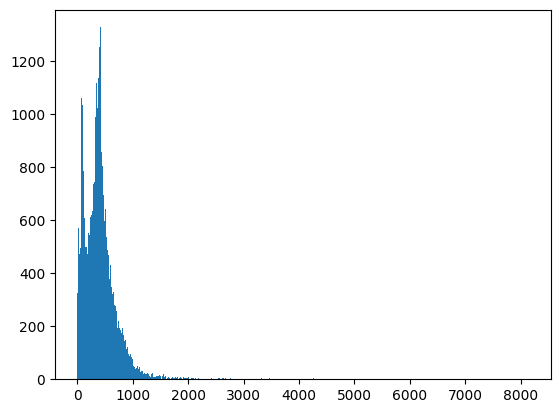

In [ ]:
plt.hist([len(x) for x in X],bins=700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [ ]:
maxlen = 1000
X = pad_sequences(X,maxlen=maxlen)


In [ ]:
len(X[0])

1000

there might be some words that tokenizer didnt tokenized so those words our model will consider as a unknown word so we need to make sure that also

In [ ]:
vocab_size = len(tokenizer.word_index) +1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size,DIM))

    for word,i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.34054053e+00,  9.71009493e-01, -1.04239628e-01, ...,
        -1.17928207e+00,  1.01789653e+00, -2.14908227e-01],
       [-8.45373154e-01, -1.72046292e+00,  1.20072174e+00, ...,
         2.24411592e-01, -1.14633358e+00,  3.62997860e-01],
       ...,
       [ 4.72721457e-03, -9.17510316e-03, -3.14071216e-02, ...,
        -3.07148341e-02,  2.40417607e-02, -1.06598455e-02],
       [ 2.70396867e-03, -2.85737198e-02, -2.58268206e-04, ...,
        -4.27108817e-03,  7.12951273e-03,  1.95178688e-02],
       [-4.63952236e-02, -1.57715362e-02, -1.10523207e-02, ...,
        -2.56648473e-02,  1.18940033e-03, -2.60948259e-02]])

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim = DIM,weights=[embedding_vectors],input_length=maxlen,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23304677 (88.90 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23187300 (88.45 MB)
_________________________________________________________________


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.fit(X_train,Y_train,validation_split=0.3,epochs=6)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


737/737 [==============================] - 65s 85ms/step - loss: 0.1511 - acc: 0.9434 - val_loss: 0.0830 - val_acc: 0.9712
Epoch 2/6
737/737 [==============================] - 60s 82ms/step - loss: 0.0706 - acc: 0.9765 - val_loss: 0.0465 - val_acc: 0.9858
Epoch 3/6
737/737 [==============================] - 62s 84ms/step - loss: 0.0394 - acc: 0.9879 - val_loss: 0.0335 - val_acc: 0.9891
Epoch 4/6
737/737 [==============================] - 64s 86ms/step - loss: 0.0443 - acc: 0.9849 - val_loss: 0.0369 - val_acc: 0.9877
Epoch 5/6
737/737 [==============================] - 62s 84ms/step - loss: 0.0216 - acc: 0.9927 - val_loss: 0.0236 - val_acc: 0.9916
Epoch 6/6
737/737 [==============================] - 63s 85ms/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0177 - val_acc: 0.9932


In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 [==============================] - 10s 30ms/step


In [ ]:
accuracy_score(Y_test,y_pred)

0.9921603563474387

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5367

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
test = ['this is a news']

In [ ]:
test_tokenized = tokenizer.texts_to_sequences(test)
test_tokenized = pad_sequences(test_tokenized,maxlen=maxlen)

In [ ]:
(model.predict(test_tokenized)>=0.5).astype(int)

1/1 [==============================] - 0s 76ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


array([[0]])

0 means Fake
1 means True

inorder to get better accuracy need large text data

In [ ]:
test = ['''The Southwest monsoon Sunday advanced over parts of Pune, Mumbai and a majority of areas in Maharashtra. Since its onset on May 30, the southwest monsoon has made steady and swift progress. Continuing its early onset trend this season, monsoon arrived over Mumbai and Pune two days ahead of its normal date of June 11.

With the latest advancement, the Northern Limit of Monsoon (NLM) now passes through Thane, Ahmednagar, Beed, Nizamabad, Sukma, Malkangiri, Vizianagaram and Islampur.

The India Meteorological Department (IMD) said that Konkan and Madhya Maharashtra had been receiving widespread heavy rainfall during the last few days. With the monsoon onset, a ‘red’ alert has been issued with chances of extremely heavy rainfall (more than 204mm in 24 hours) over coastal Karnataka, Konkan, Madhya Maharashtra till Monday. Heavy rainfall will continue over these regions during the week ahead. These areas will remain under an ‘orange’ alert till Tuesday, as the monsoon activity is likely to continue through the week ahead.

Read | Heavy showers likely this week; orange alert for Thane, Raigad
On Sunday, Pune (Shivajinagar) recorded 117mm rain, becoming the third wettest June day since 1969. Thunder and heavy downpour had crippled city and large parts of Mumbai late on Saturday, inundating most of the major roads and underpasses. Pune’s Lohegaon and peripheral areas recorded 1398mm during the past 24 hours, the IMD data said. The average rainfall over Pune (Shivajinagar) for June is 156.3mm.

With Saturday’s heavy spell, the city has surpassed the monthly average and has now received a total of 209.1mm (till 8.30am of Sunday), notably prior to the monsoon onset. Since 1969, the wettest June day in Pune was experienced in 1991, when the city recorded 529.5mm against the annual rainfall of 763mm.''']

In [ ]:
test_tokenized = tokenizer.texts_to_sequences(test)
test_tokenized = pad_sequences(test_tokenized,maxlen=maxlen)

In [ ]:
(model.predict(test_tokenized)>=0.5).astype(int)

1/1 [==============================] - 0s 34ms/step


array([[1]])